In [24]:
import cv2 as cv2
from skimage import io
import matplotlib.pyplot as plt

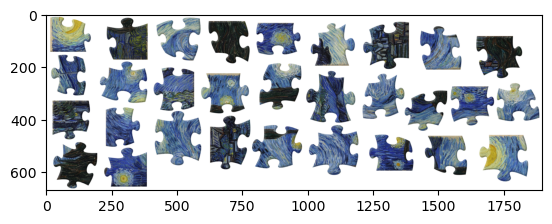

In [25]:
puzzle = io.imread('exemples/van-gogh.png')
plt.imshow(puzzle)

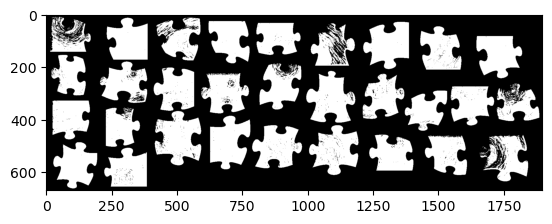

In [26]:
van_gogh_gray = cv2.cvtColor(puzzle, cv2.COLOR_RGB2GRAY)
# Adapter le thresholding à l'image
_, van_gogh_binary = cv2.threshold(van_gogh_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(van_gogh_binary, cmap='gray')

## Image segmentation

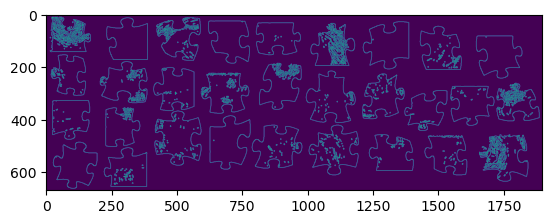

In [27]:
# Detect edges using canny
blurred_van_gogh = cv2.GaussianBlur(van_gogh_binary, (5, 5), 0)
van_gogh_edges = cv2.Canny(blurred_van_gogh, 50, 150)
plt.imshow(van_gogh_edges)

Comparing contour finding with edge detection or just binary image

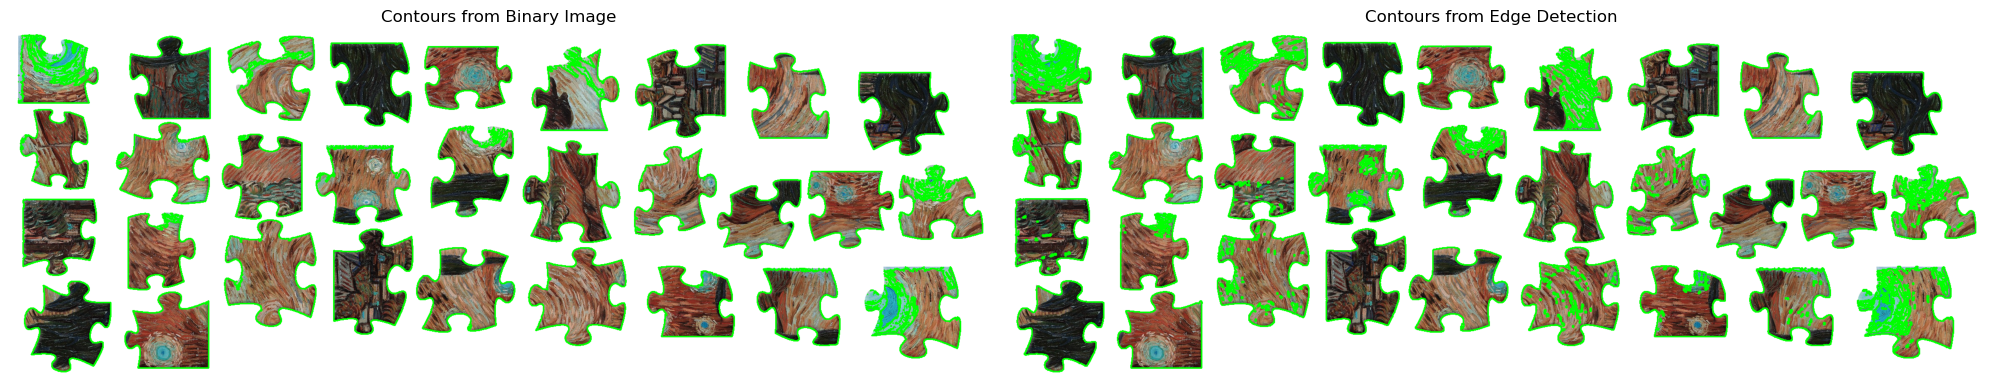

Number of contours from binary image: 366
Number of contours from edge detection: 738


In [28]:
# Your existing code for finding contours
contours_binary, _ = cv2.findContours(van_gogh_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_edges, _ = cv2.findContours(van_gogh_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create two copies of the original image for drawing contours
contour_image_binary = puzzle.copy()
contour_image_edges = puzzle.copy()

# Draw contours on both images
cv2.drawContours(contour_image_binary, contours_binary, -1, (0, 255, 0), 2)
cv2.drawContours(contour_image_edges, contours_edges, -1, (0, 255, 0), 2)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Display the binary contour image
ax1.imshow(cv2.cvtColor(contour_image_binary, cv2.COLOR_BGR2RGB))
ax1.set_title('Contours from Binary Image')
ax1.axis('off')

# Display the edge contour image
ax2.imshow(cv2.cvtColor(contour_image_edges, cv2.COLOR_BGR2RGB))
ax2.set_title('Contours from Edge Detection')
ax2.axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Print the number of contours found in each method
print(f"Number of contours from binary image: {len(contours_binary)}")
print(f"Number of contours from edge detection: {len(contours_edges)}")